In [2]:
import pandas as pd

dbean = pd.read_csv('data/dry_beans.csv')

print(dbean.head())
print(dbean.info())

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

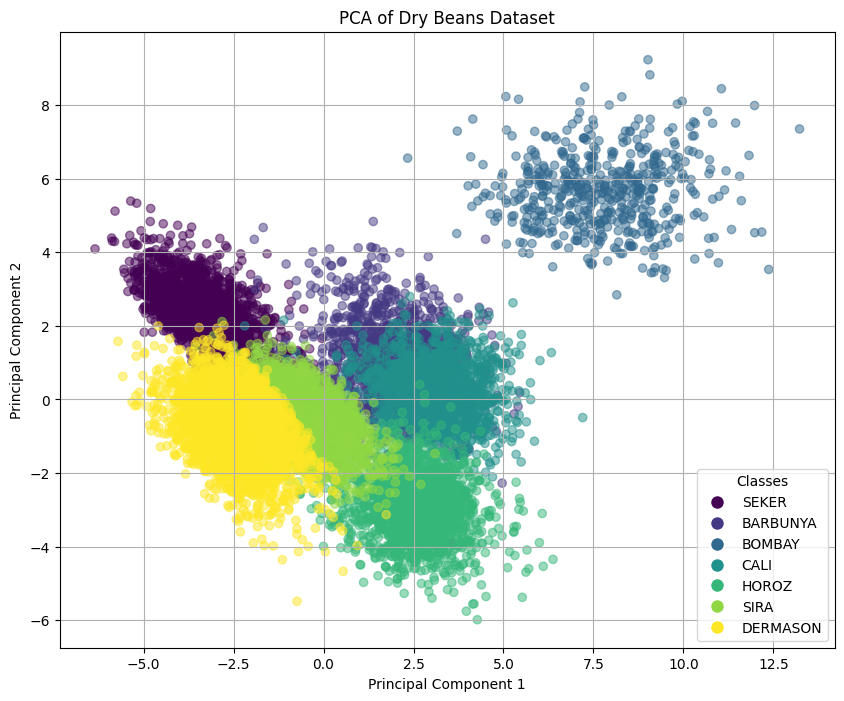

In [3]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = dbean.iloc[:, :-1]
y = dbean['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
plt.grid()
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.factorize(y)[0], cmap='viridis', alpha=0.5)
plt.title('PCA of Dry Beans Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
unique_classes = y.unique()
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) for i in range(len(unique_classes))]
plt.legend(handles, unique_classes, title="Classes")
plt.show()

Naive Bayes - Accuracy: 0.8969147894221352, Recall: 0.8969147894221352, Precision: 0.8993154760218639, Fitting Time: 0.0068 seconds


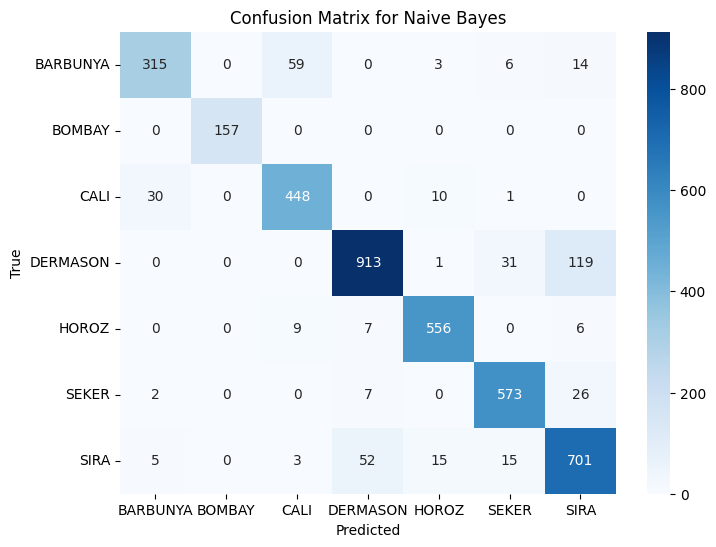

Logistic Regression - Accuracy: 0.921645445641528, Recall: 0.921645445641528, Precision: 0.9222582518706165, Fitting Time: 0.1080 seconds


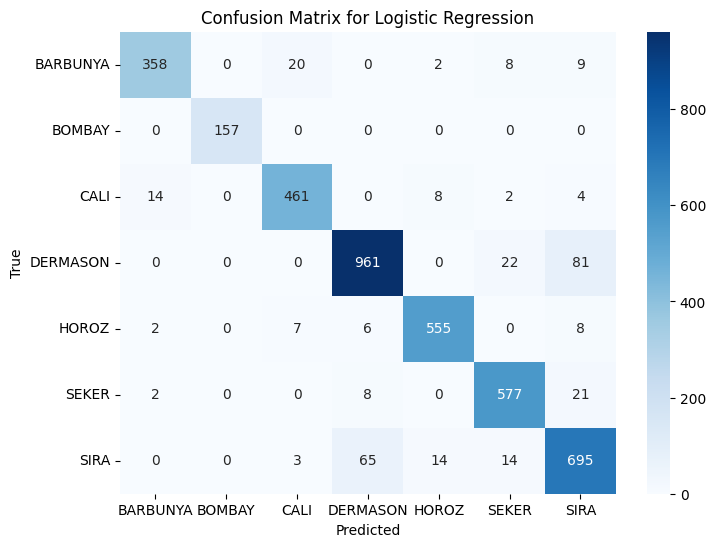

MLP - Accuracy: 0.9267874632713027, Recall: 0.9267874632713027, Precision: 0.9278551898422263, Fitting Time: 3.0544 seconds


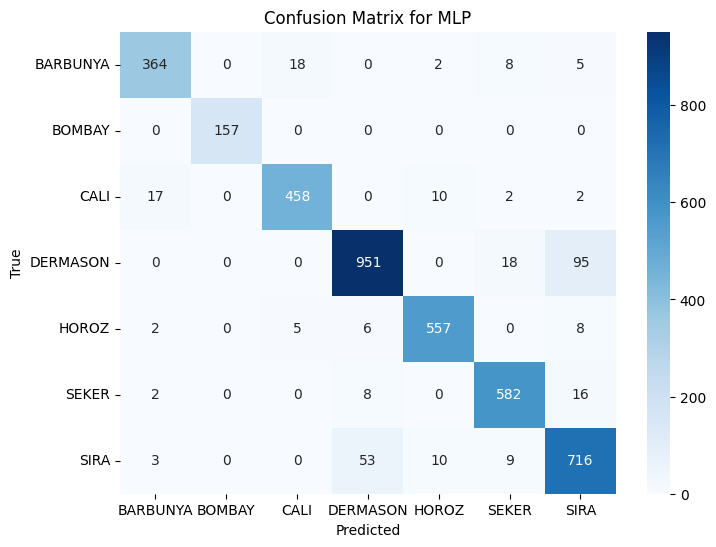

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import seaborn as sns
import time

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "MLP": MLPClassifier(hidden_layer_sizes=(32,), max_iter=1000)
}

fitting_times = {}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    fitting_times[name] = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"{name} - Accuracy: {accuracy}, Recall: {recall}, Precision: {precision}, Fitting Time: {fitting_times[name]:.4f} seconds")

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

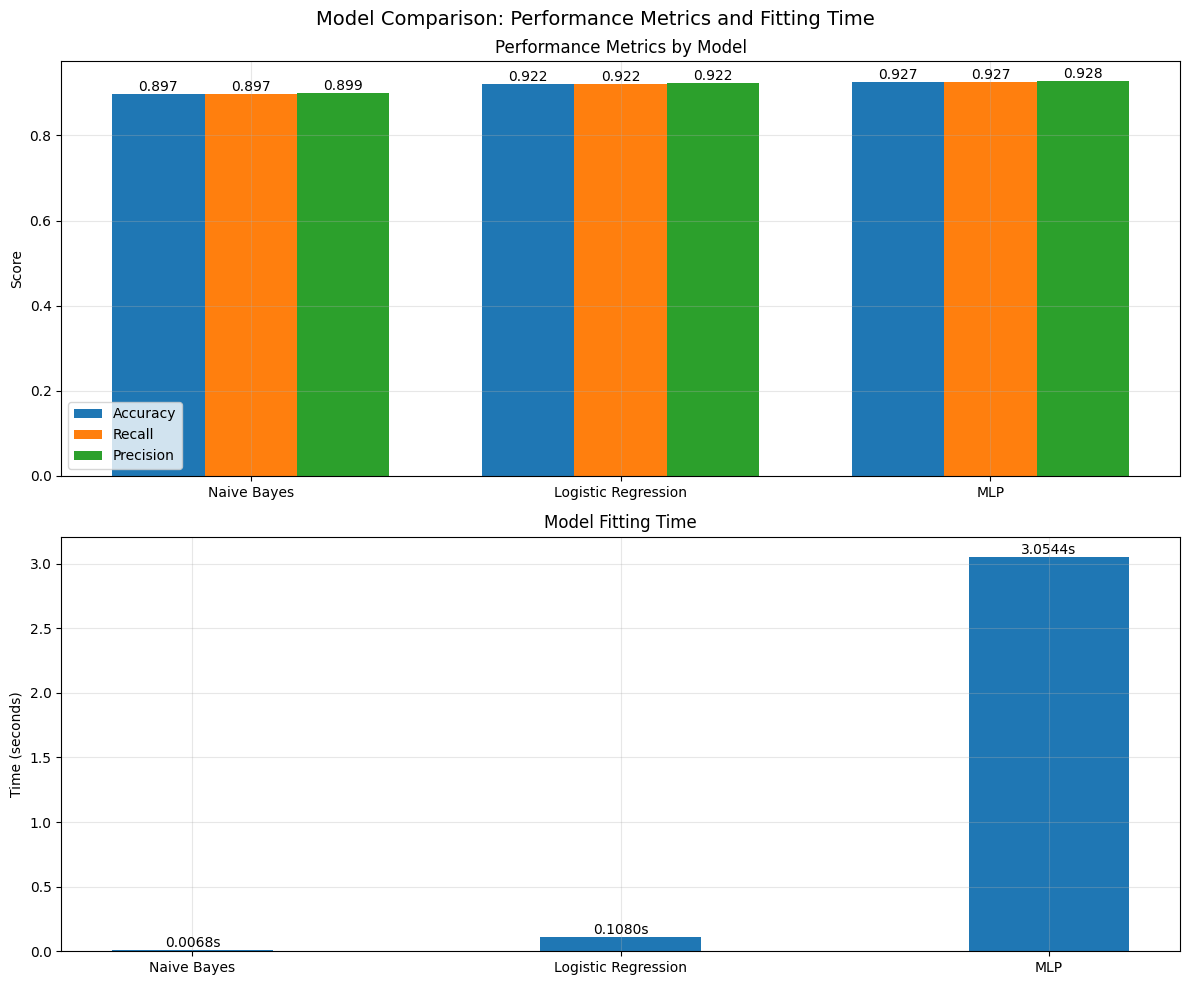

In [5]:
import numpy as np

results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Time': fitting_times[name]
    }

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
fig.suptitle('Model Comparison: Performance Metrics and Fitting Time', fontsize=14)

metrics = ['Accuracy', 'Recall', 'Precision']
model_names = list(results.keys())
x = np.arange(len(model_names))
width = 0.25

for i, metric in enumerate(metrics):
    values = [results[model][metric] for model in model_names]
    bars = ax1.bar(x + i*width, values, width, label=metric)
    
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom')

ax1.set_ylabel('Score')
ax1.set_title('Performance Metrics by Model')
ax1.set_xticks(x + width)
ax1.set_xticklabels(model_names)
ax1.legend()
ax1.grid(True, alpha=0.3)

times = [results[model]['Time'] for model in model_names]
bars = ax2.bar(x + width, times, width*1.5)

for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}s',
            ha='center', va='bottom')

ax2.set_ylabel('Time (seconds)')
ax2.set_title('Model Fitting Time')
ax2.set_xticks(x + width)
ax2.set_xticklabels(model_names)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Evaluation on original data:
All models performed well with the best being MLP. This implies that the data is relatively correlated and even linearly seperable implied by similar performance by both logistic regresison and MLP. Probabilistic approach with Naive Bayes also yielded good results, this could be thanks to the number of samples being able to capture the relationship of the classes. Naive Bayes fitted the fastest which is expected, iterative approaches takes longer incrementally with logistic regression taking slightly longer and MLP taking significantly more time to fit which is expected considering the backpropagation process.

Naive Bayes - Accuracy: 0.8638589618021547, Recall: 0.8638589618021547, Precision: 0.8639347265191425, Fitting Time: 0.0060 seconds


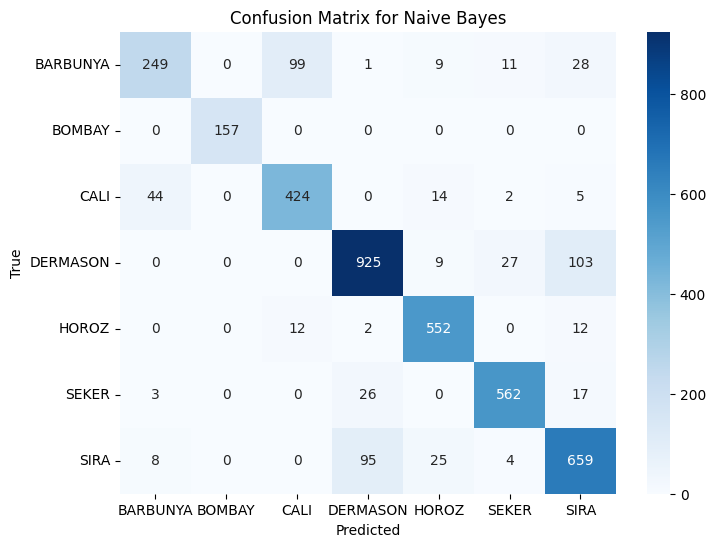

Logistic Regression - Accuracy: 0.8893241919686582, Recall: 0.8893241919686582, Precision: 0.8892168736438861, Fitting Time: 0.0901 seconds


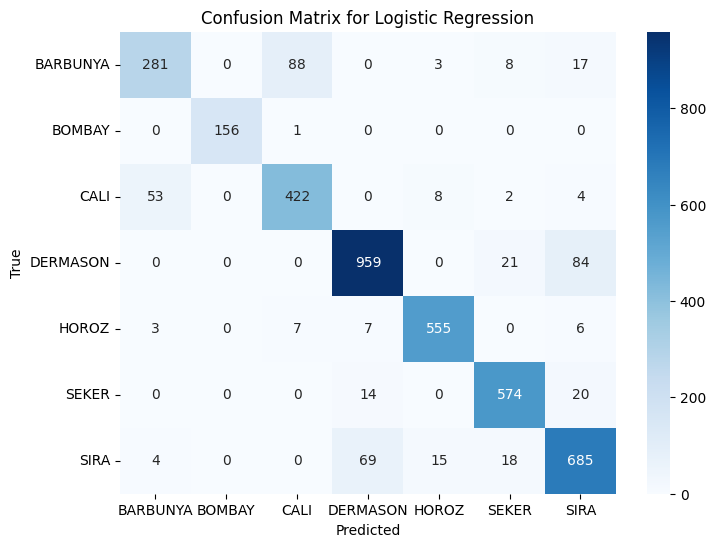

MLP - Accuracy: 0.8969147894221352, Recall: 0.8969147894221352, Precision: 0.8976211062312515, Fitting Time: 1.9857 seconds


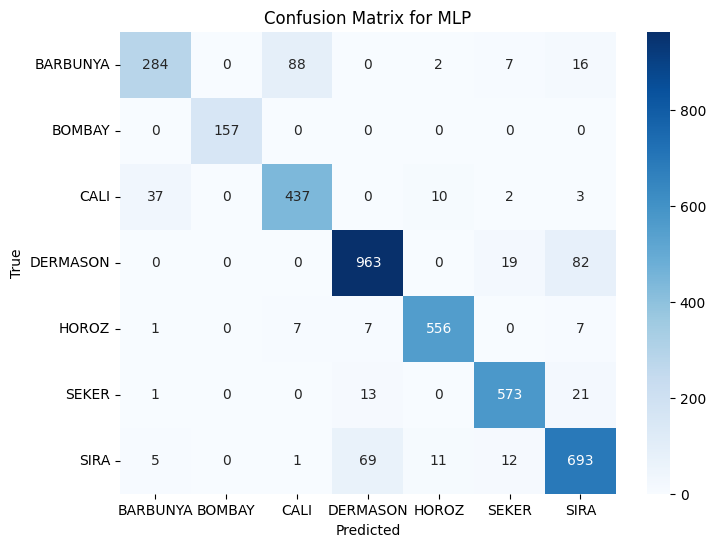

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import seaborn as sns
import time
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "MLP": MLPClassifier(hidden_layer_sizes=(32,), max_iter=1000)
}

fitting_times = {}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_pca, y_train)
    fitting_times[name] = time.time() - start_time

    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"{name} - Accuracy: {accuracy}, Recall: {recall}, Precision: {precision}, Fitting Time: {fitting_times[name]:.4f} seconds")

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

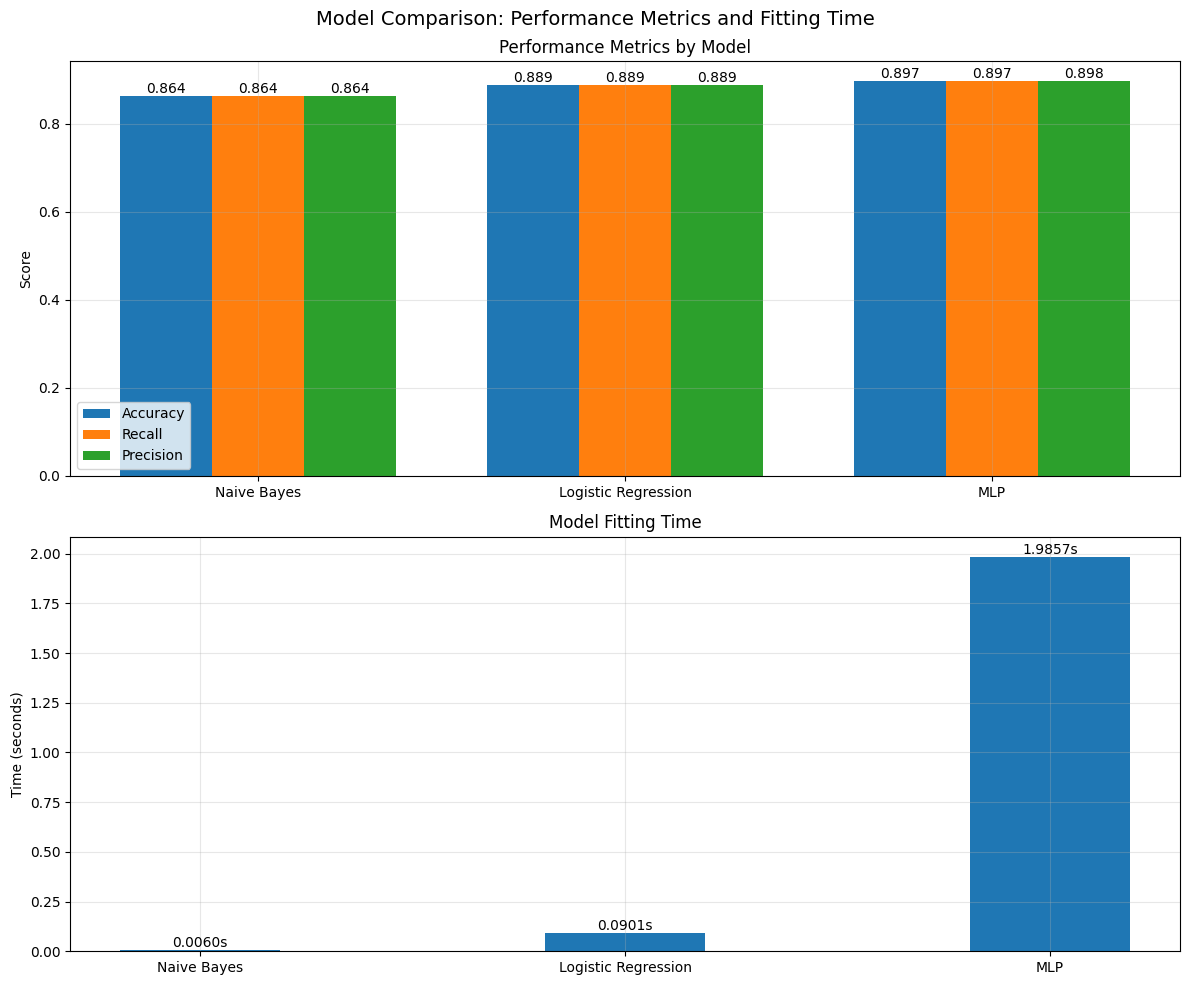

In [8]:
import numpy as np

results = {}
for name, model in models.items():
    y_pred = model.predict(X_test_pca)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Time': fitting_times[name]
    }

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
fig.suptitle('Model Comparison: Performance Metrics and Fitting Time', fontsize=14)

metrics = ['Accuracy', 'Recall', 'Precision']
model_names = list(results.keys())
x = np.arange(len(model_names))
width = 0.25

for i, metric in enumerate(metrics):
    values = [results[model][metric] for model in model_names]
    bars = ax1.bar(x + i*width, values, width, label=metric)
    
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom')

ax1.set_ylabel('Score')
ax1.set_title('Performance Metrics by Model')
ax1.set_xticks(x + width)
ax1.set_xticklabels(model_names)
ax1.legend()
ax1.grid(True, alpha=0.3)

times = [results[model]['Time'] for model in model_names]
bars = ax2.bar(x + width, times, width*1.5)

for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}s',
            ha='center', va='bottom')

ax2.set_ylabel('Time (seconds)')
ax2.set_title('Model Fitting Time')
ax2.set_xticks(x + width)
ax2.set_xticklabels(model_names)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Evaluation on reduced data:
Perfomance did not drop too much, yet generalization is maintained with reduced fitting time across all models. This is expected given our prior results with the original data which already implies correlation and linearity.